In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import glob
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
from ipywidgets import IntProgress

In [3]:
import torch
t_cpu = torch.rand(500,500,500)
%timeit t_cpu @ t_cpu

120 ms ± 91.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
t_gpu = torch.rand(500,500,500).cuda()
%timeit t_gpu @ t_gpu

33.5 µs ± 21.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
pngs = glob.glob('sd02/sd02/data/*/*/*.png')
pngs.extend(glob.glob('sd06/sd06/data/*/*/*.png'))
tags = [open(png[:-4] + '.fmt').readline().strip() for png in pngs]
len(pngs), len(tags)

(11185, 11185)

In [6]:
df = pd.DataFrame(dict(fname=pngs, label=tags))
df.head()

,fname,label
0,sd02/sd02/data/sfrs_0/r0029/r0029_05.png,sch_e_1
1,sd02/sd02/data/sfrs_0/r0029/r0029_04.png,sch_c_2
2,sd02/sd02/data/sfrs_0/r0029/r0029_02.png,sch_b
3,sd02/sd02/data/sfrs_0/r0029/r0029_00.png,1040_1
4,sd02/sd02/data/sfrs_0/r0029/r0029_03.png,sch_c_1


In [7]:
df['label'].value_counts(normalize=True)

1040_2      0.160930
1040_1      0.160930
sch_b       0.101743
sch_a       0.087528
sch_e_1     0.060796
sch_e_2     0.060438
4562_2      0.048637
4562_1      0.045418
sch_d_2     0.042825
sch_d_1     0.041842
sch_c_1     0.035315
sch_se_1    0.023782
sch_se_2    0.019759
2441        0.017970
6251        0.017613
sch_c_2     0.016987
2106_1      0.016451
sch_f_1     0.015825
2106_2      0.014215
sch_f_2     0.010997
Name: label, dtype: float64

In [8]:
img_size = 224
bs = 64

In [9]:
data = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='label', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


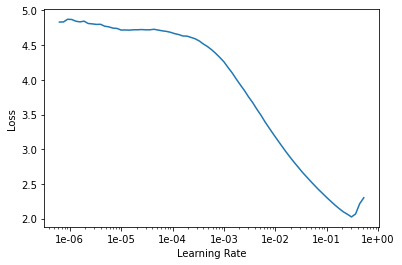

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.129087,0.000301,0.000000,04:21
1,0.039408,0.022496,0.006705,04:19
2,0.010526,0.000000,0.000000,04:20
3,0.001374,0.000000,0.000000,04:19


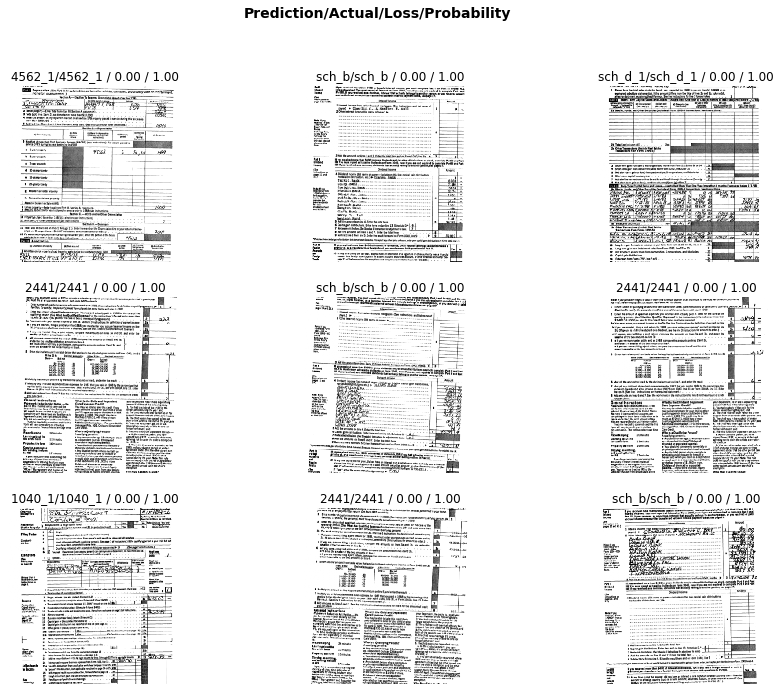

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [16]:
from google_images_download import google_images_download